In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('D:\\Project - Heart Disease Diagnostic Analysis\\Heart Disease data\\Heart_Disease_data.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")

Rows: 1025
Columns: 14


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
dpl = df[df.duplicated()]
print(f"Number of duplicate rows: {dpl.shape[0]}")

Number of duplicate rows: 723


In [8]:
print('Number of unique values per column')
df.nunique()

Number of unique values per column


age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Showing Count of Target Variable

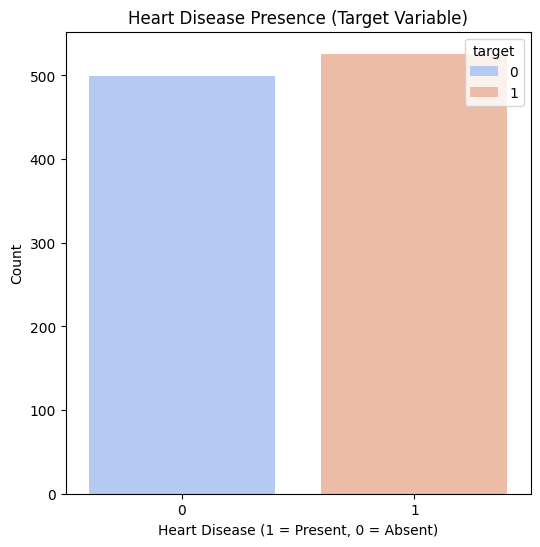

In [15]:
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='target', hue='target', palette='coolwarm')
plt.title('Heart Disease Presence (Target Variable)')
plt.xlabel('Heart Disease (1 = Present, 0 = Absent)')
plt.ylabel('Count')
plt.show()

In [18]:
# Define categorical features list
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

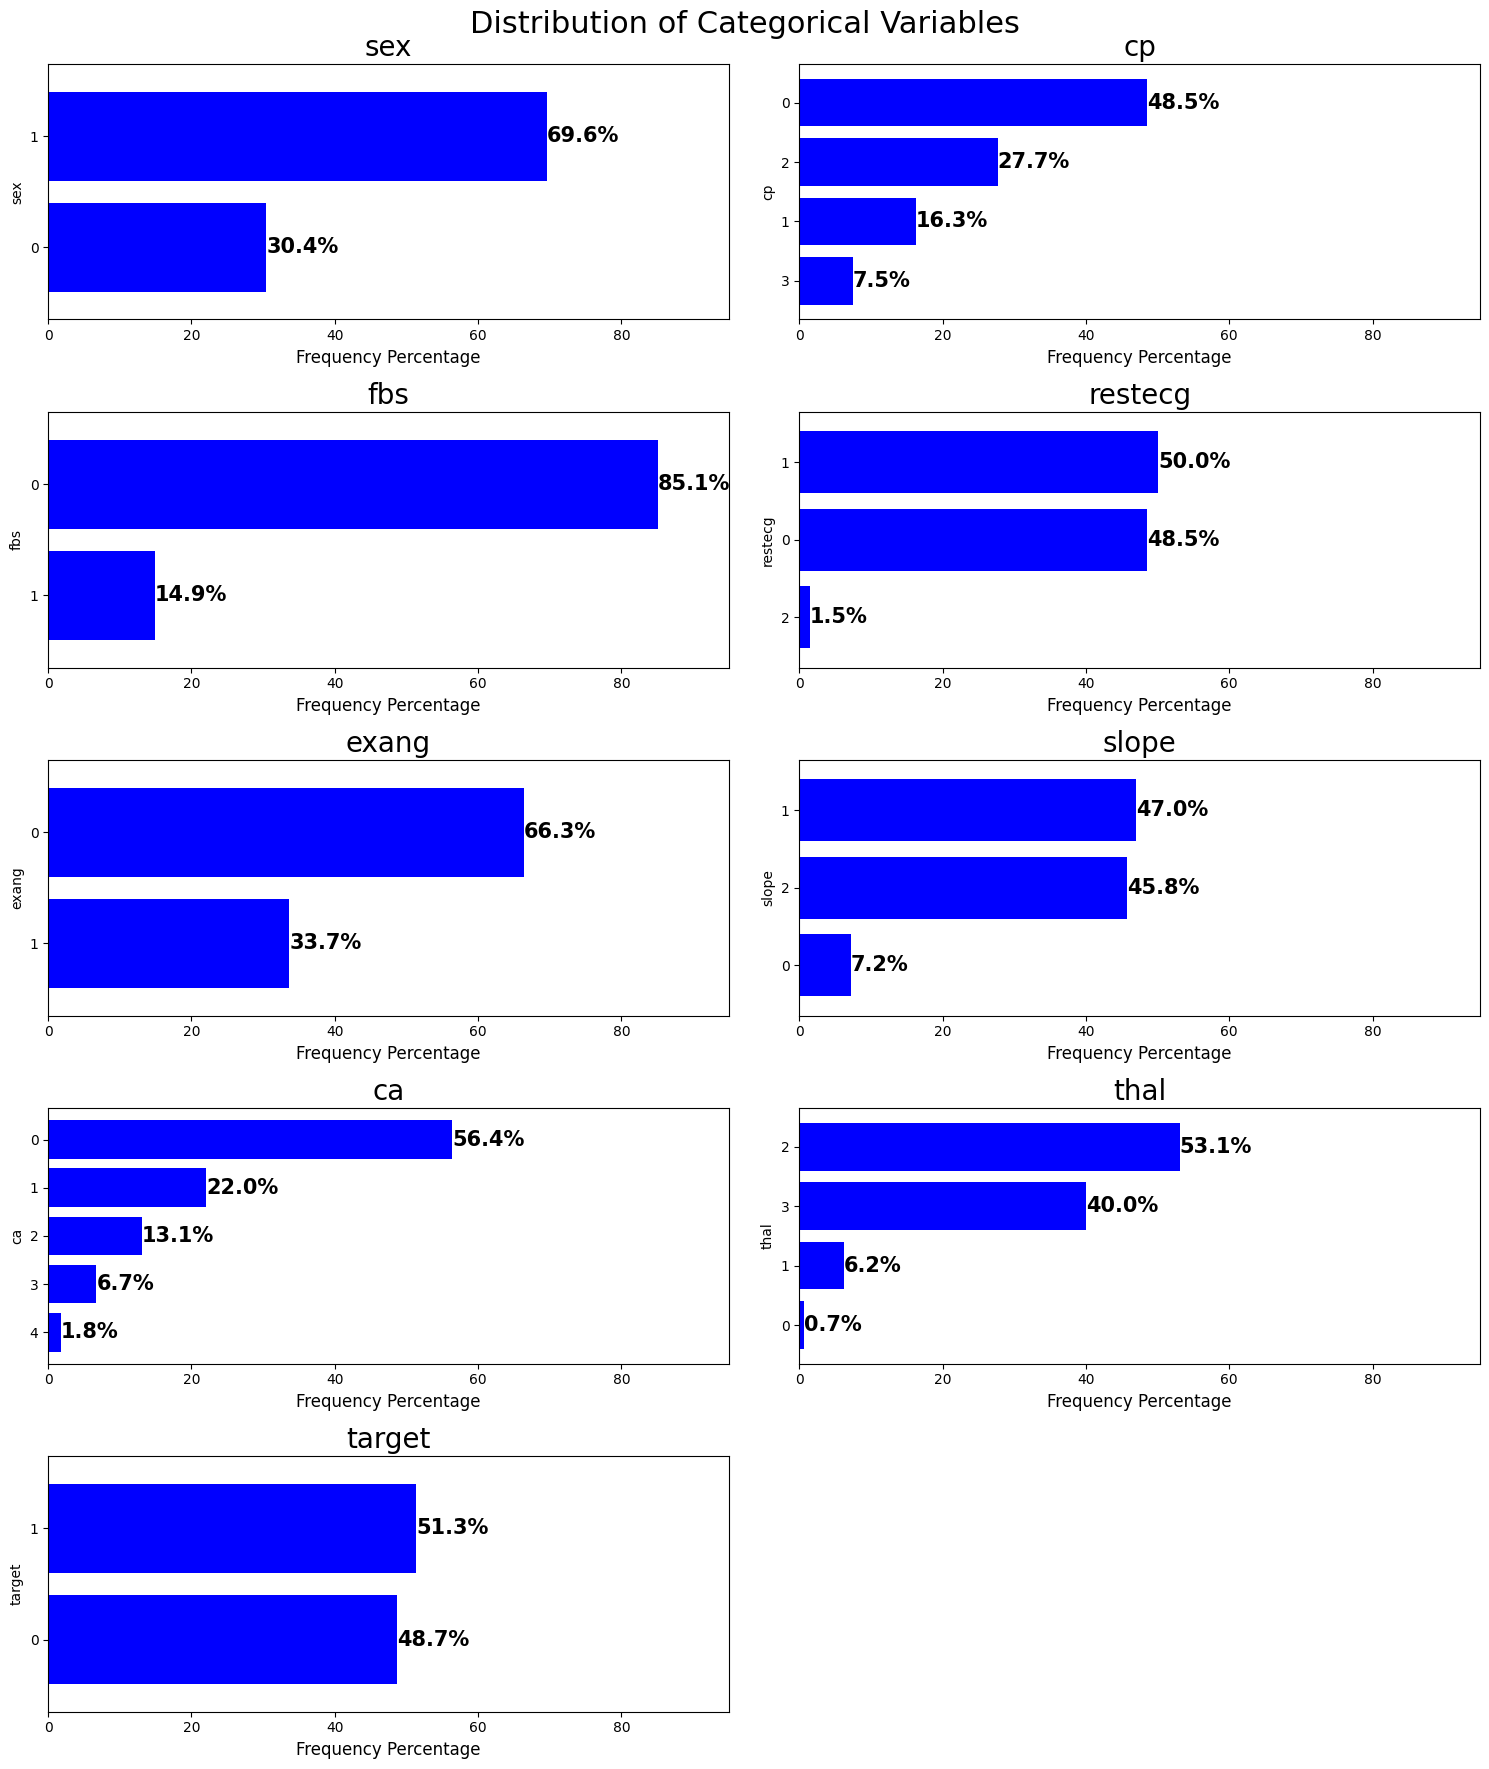

In [20]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 18))

# Loop to plot bar charts for each categorical feature in the 4x2 layout
for i, col in enumerate(categorical_features):
    row = i // 2
    col_idx = i % 2
    
    # Calculate frequency percentages
    value_counts = df[col].value_counts(normalize=True).mul(100).sort_values()
    
    # Plot bar chart
    value_counts.plot(kind='barh', ax=ax[row, col_idx], width=0.8, color='blue')
    
    # Add frequency percentages to the bars
    for index, value in enumerate(value_counts):
        ax[row, col_idx].text(value, index, str(round(value, 1)) + '%', fontsize=15, weight='bold', va='center')
    
    ax[row, col_idx].set_xlim([0, 95])
    ax[row, col_idx].set_xlabel('Frequency Percentage', fontsize=12)
    ax[row, col_idx].set_title(f'{col}', fontsize=20)

ax[4,1].axis('off')
plt.suptitle('Distribution of Categorical Variables', fontsize=22)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

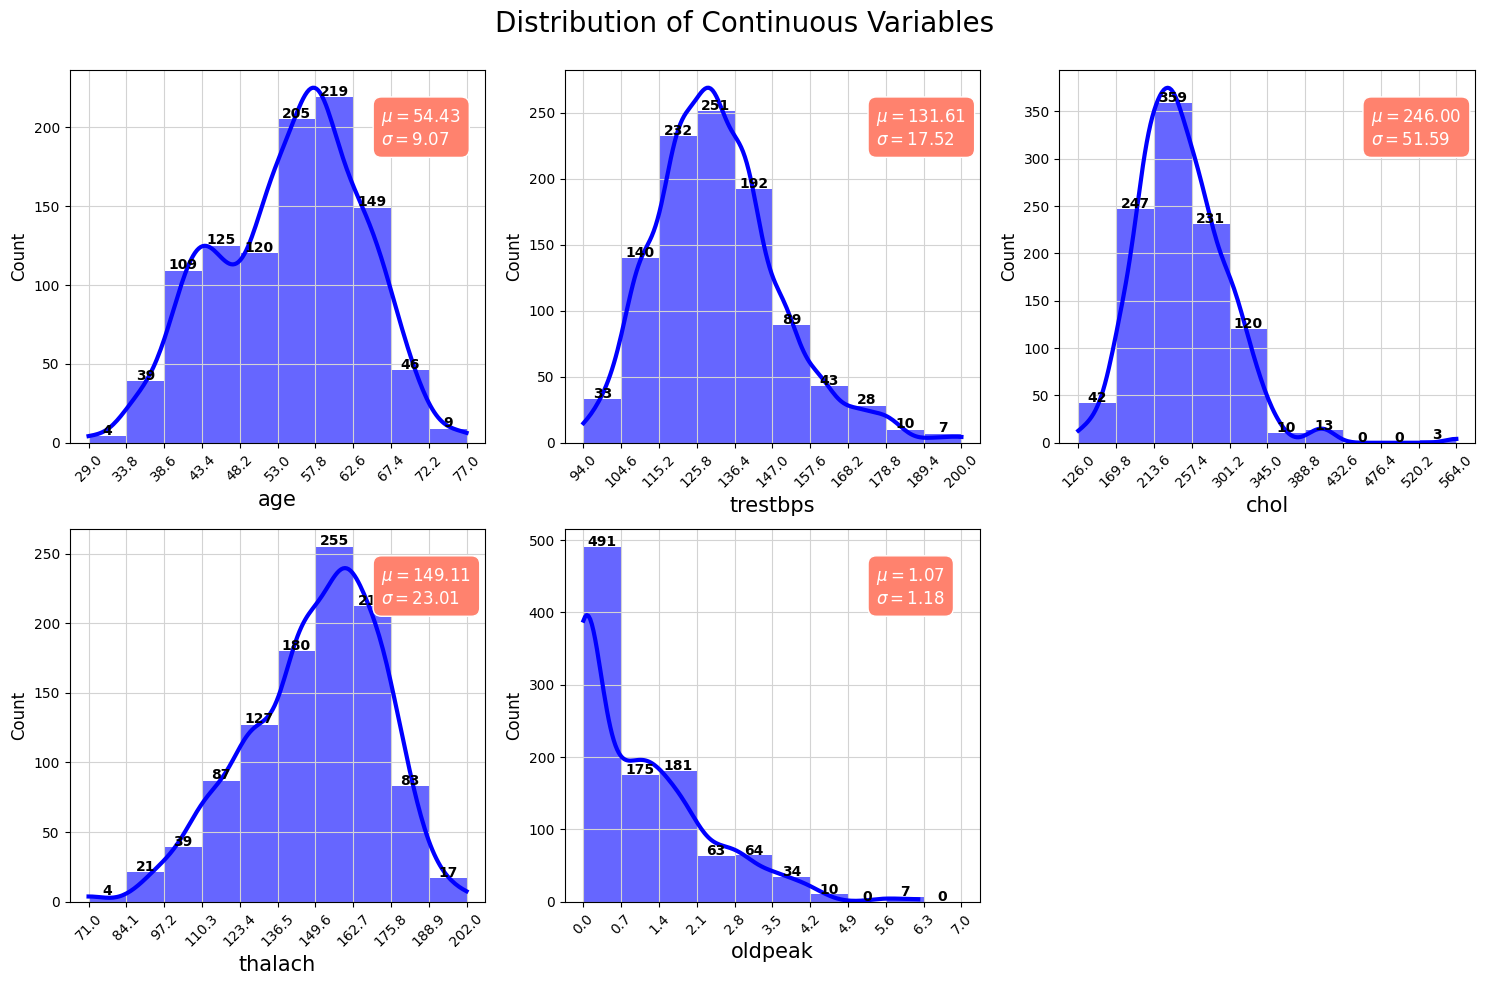

In [28]:
df_continuous = df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
# Plotting
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Loop to plot histograms for each continuous feature
for i, col in enumerate(df_continuous.columns):
    x = i // 3
    y = i % 3
    values, bin_edges = np.histogram(
        df_continuous[col], 
        range=(np.floor(df_continuous[col].min()), np.ceil(df_continuous[col].max()))
    )

    # Histogram with KDE plot
    graph = sns.histplot(
        data=df_continuous, x=col, bins=bin_edges, kde=True, ax=ax[x, y],
        edgecolor='none', color='blue', alpha=0.6, line_kws={'lw': 3}
    )
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Count', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')
    
    # Adding annotations to bars
    for j, p in enumerate(graph.patches):
        ax[x, y].annotate(
            f'{p.get_height():.0f}', 
            (p.get_x() + p.get_width() / 2, p.get_height() + 1),
            ha='center', fontsize=10, fontweight="bold"
        )
    
    # Text with mean and standard deviation
    textstr = '\n'.join((
        r'$\mu=%.2f$' % df_continuous[col].mean(),
        r'$\sigma=%.2f$' % df_continuous[col].std()
    ))
    ax[x, y].text(
        0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12,
        verticalalignment='top', color='white',
        bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5)
    )

# Hide the last unused subplot if needed
ax[1, 2].axis('off')
plt.suptitle('Distribution of Continuous Variables', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

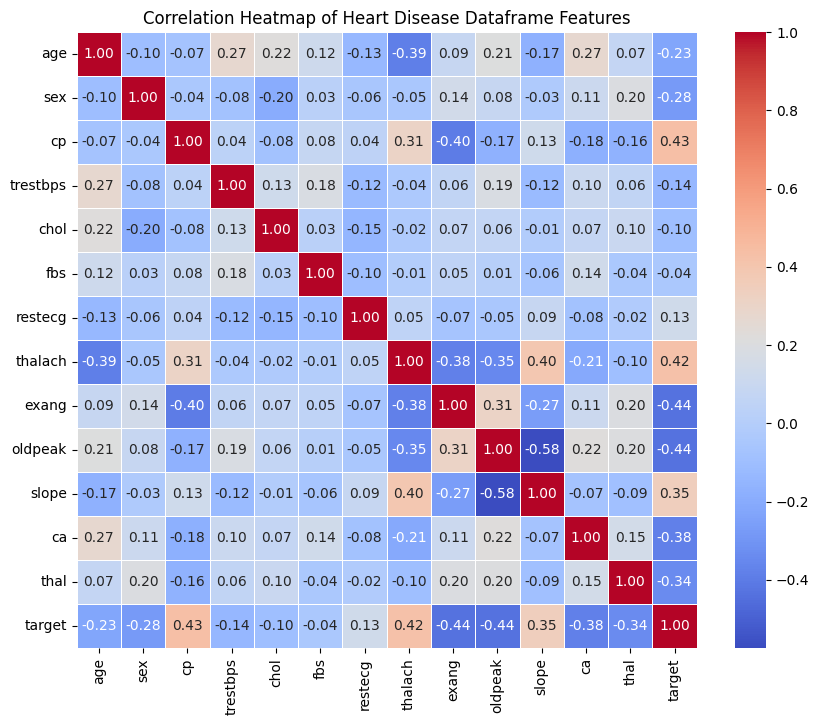

In [11]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap with seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Customize the plot
plt.title("Correlation Heatmap of Heart Disease Dataframe Features")
plt.show()

In [5]:
# Define the age groups based on age ranges
def age_group_label(age):
    if age < 35:
        return 'Young Age'
    elif 35 <= age < 60:
        return 'Middle Age'
    else:
        return 'Senior Age'

# Create a new DataFrame with the age group column
age_group = df.copy()
age_group['age_group'] = age_group['age'].apply(age_group_label)

# Display the first few rows to verify the age group categorization
print(age_group[['age', 'age_group']].head())

   age   age_group
0   52  Middle Age
1   53  Middle Age
2   70  Senior Age
3   61  Senior Age
4   62  Senior Age


In [6]:
# Add the 'age_group' column to the existing Heart_Disease_data DataFrame
df['age_group'] = df['age'].apply(age_group_label)

# Display the first few rows to verify the age group categorization
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Middle Age
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Middle Age
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Senior Age
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Senior Age
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Senior Age


In [9]:
df['sex'] = df['sex'].replace({1: 'Male', 0: 'Female'})
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
0,52,Male,0,125,212,0,1,168,0,1.0,2,2,3,0,Middle Age
1,53,Male,0,140,203,1,0,155,1,3.1,0,0,3,0,Middle Age
2,70,Male,0,145,174,0,1,125,1,2.6,0,0,3,0,Senior Age
3,61,Male,0,148,203,0,1,161,0,0.0,2,1,3,0,Senior Age
4,62,Female,0,138,294,1,1,106,0,1.9,1,3,2,0,Senior Age


In [10]:
df['target'] = df['target'].replace({1: 'Presence', 0: 'Absence'})
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
0,52,Male,0,125,212,0,1,168,0,1.0,2,2,3,Absence,Middle Age
1,53,Male,0,140,203,1,0,155,1,3.1,0,0,3,Absence,Middle Age
2,70,Male,0,145,174,0,1,125,1,2.6,0,0,3,Absence,Senior Age
3,61,Male,0,148,203,0,1,161,0,0.0,2,1,3,Absence,Senior Age
4,62,Female,0,138,294,1,1,106,0,1.9,1,3,2,Absence,Senior Age


In [11]:
# Export the transformed data to CSV
export_file_path ='D:\\Project - Heart Disease Diagnostic Analysis\\Heart Disease data\\Transformed_Heart_Disease_data.csv'
df.to_csv(export_file_path, index=False)